In [4]:
#Data Analysis of the Mortality Rate (Age Adjusted) with Other countries of Similar Size and economy.

#Questions this Analysis looks into - 
# 1. How does the Death Rate of United States compare with the Rest of the world
# 2. Does economy and size of a country indicate its Mortality Rate? Is there significant hypothesis to be made that this 
# indicates a death rate of a country.

In [22]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
import seaborn as sns
 

In [23]:
df = pd.read_csv("Data/global_death_rate.csv")

# Drop Germany & Australia which has incomplete data
df = df.drop('Germany', 1).drop('Canada', 1).drop('Australia',1)
df.head()

,Year,United States,Comparable Country Average,Austria,Belgium,France,Japan,Netherlands,Sweden,Switzerland,United Kingdom
0,1980,1184,1223,1415.7,1381.4,1163.2,1093.5,1133.1,1174.7,1151.9,1359.4
1,1981,1154,1202,1409.7,1350.0,1163.6,1089.9,1121.7,1156.4,1138.4,1310.3
2,1982,1127,1182,1373.3,1313.7,1124.6,1029.1,1115.7,1116.1,1102.2,1306.9
3,1983,1146,1171,1392.1,1340.5,1143.2,1037.5,1105.4,1100.3,1109.8,1285.3
4,1984,1125,1133,1310.1,1283.6,1089.9,1001.7,1100.5,1073.8,1046.2,1241


In [24]:
df.describe()

,Year,United States,Comparable Country Average,Austria,Belgium,Japan,Netherlands,Sweden,Switzerland
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,1997.500000,995.472222,936.222222,1033.480556,1027.586111,783.227778,971.627778,919.475000,869.250000
std,10.535654,114.681045,158.890638,211.905887,181.150310,156.632629,125.641873,136.202185,153.429251
min,1980.000000,822.000000,700.000000,735.800000,745.600000,575.700000,753.300000,713.100000,647.600000
25%,1988.750000,882.000000,786.250000,836.300000,856.025000,642.350000,857.250000,799.050000,719.025000
50%,1997.500000,1013.500000,932.500000,1013.500000,1014.650000,753.800000,1007.350000,904.400000,872.300000
75%,2006.250000,1086.750000,1055.250000,1178.325000,1146.325000,890.025000,1064.700000,1029.050000,990.900000
max,2015.000000,1184.000000,1223.000000,1415.700000,1381.400000,1093.500000,1133.100000,1174.700000,1151.900000


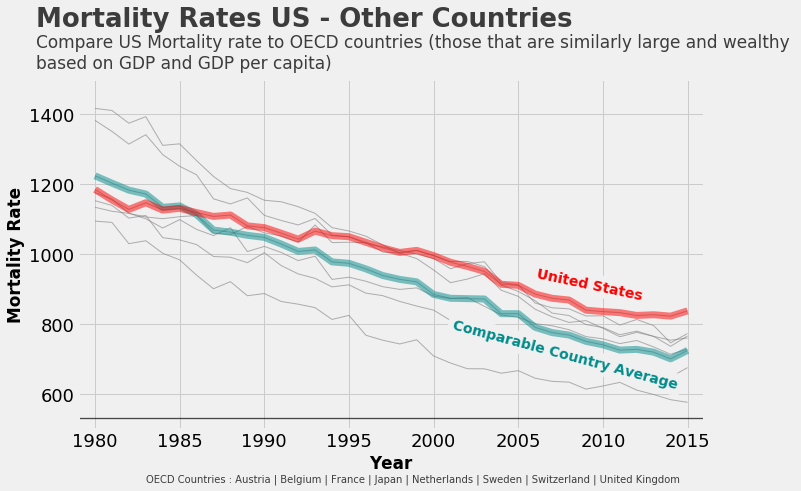

In [36]:
plt.style.use('fivethirtyeight')

# Plot Lines for each country
df.set_index('Year').plot(marker='', color='gray', linewidth=1, alpha=0.6,subplots=False,legend=False,figsize = (10,6))
plt.plot(df['Year'], df['Comparable Country Average'], marker='', color='darkcyan', linewidth=7, alpha=0.5)
plt.plot(df['Year'], df['United States'], marker='', color='red', linewidth=7, alpha=0.5)

# Set limit and axis
plt.ylim(500,1500)

plt.axhline(y = 530, color = 'black', linewidth = 1.3, alpha = .7)
plt.xlabel("Year",weight = 'bold')
plt.ylabel("Mortality Rate",weight = 'bold')
plt.tick_params(axis = 'both', labelsize = 18)
plt.xlim(left = 1979, right = 2016)

# Label US and Comparable Country Ave 
plt.text(x = 2006, y = 870, s = 'United States', color = 'red', weight = 'bold', rotation = -12,
              backgroundcolor = '#f0f0f0')
plt.text(x = 2001, y = 615, s = 'Comparable Country Average', color = 'darkcyan', weight = 'bold', rotation = -15,
              backgroundcolor = '#f0f0f0')

#Add Title and subtitle
plt.text(x = 1976.5, y = 1650, s = "Mortality Rates US - Other Countries",
               fontsize = 26, weight = 'bold',color='black', alpha = .75)
plt.text(x = 1976.5, y = 1530, s = "Compare US Mortality rate to OECD countries (those that are similarly large and wealthy \nbased on GDP and GDP per capita) ",
               fontsize = 17, alpha = .75)
plt.text(x = 1983, y = 350, s = "OECD Countries : Austria | Belgium | France | Japan | Netherlands | Sweden | Switzerland | United Kingdom",
               fontsize = 10, alpha = .75)
# Save figure
plt.savefig("Charts/US_Mortality_v_Global.png",bbox_inches="tight",dpi = 150)

# Display The chart of Mortality Rate US v Countries of Similar Size and GDP
plt.show()


<Figure size 1440x720 with 0 Axes>

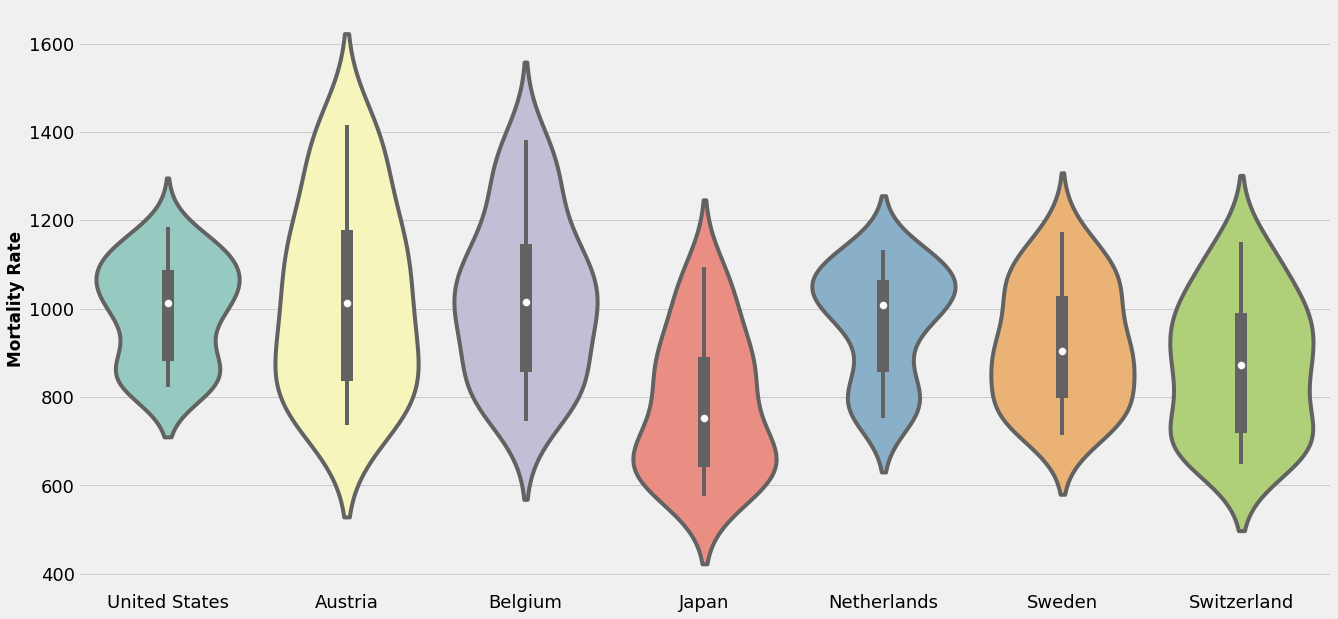

In [37]:
# Plot Violin plot for Countries above to compare to United States Mortality data
plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))
df_group = df.drop('Year', 1).drop('Comparable Country Average',1)
sns.violinplot(data=df_group,scale="width", palette="Set3")

plt.ylabel("Mortality Rate",weight = 'bold')
plt.tick_params(axis = 'both', labelsize = 18)

# Save figure
plt.savefig("Charts/US_v_Global_violin_plot.png",bbox_inches="tight",dpi = 150)
plt.show()


In [38]:
# ANOVA Test US - OECD Countries - Does Size and Poverty indicate significance in mortality rate dataset
# If pvalue < 0.05 then there are significant differences between the dataset

group1 = df_group['United States']
group2 = df_group['Austria']
group3 = df_group['Belgium']
group4 = df_group['Japan']
group5 = df_group['Netherlands']
group6 = df_group['Sweden']
group7 = df_group['Switzerland']

stats.f_oneway(group1, group2, group3, group4, group5,group6,group7)

F_onewayResult(statistic=12.224121776617295, pvalue=5.036253643447928e-12)

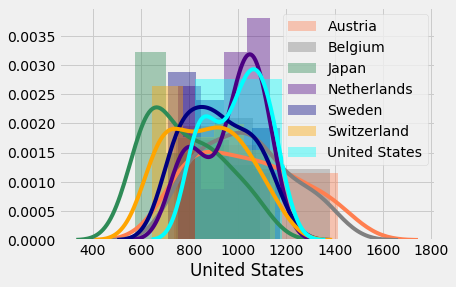

In [39]:
# Distribution of the data for the Countries
sns.distplot( df_group['Austria'] , color="coral", label="Austria")
sns.distplot( df_group['Belgium'] , color="gray", label="Belgium")
sns.distplot( df_group['Japan'] , color="seagreen", label="Japan")
sns.distplot( df_group['Netherlands'] , color="indigo", label="Netherlands")
sns.distplot( df_group['Sweden'] , color="navy", label="Sweden")
sns.distplot( df_group['Switzerland'] , color="orange", label="Switzerland")
sns.distplot( df_group['United States'] , color="cyan", label="United States")

# Save figure
plt.savefig("Charts/US_Mortality_v_Global_Distribution.png",bbox_inches="tight",dpi = 150)
plt.legend()
plt.show()

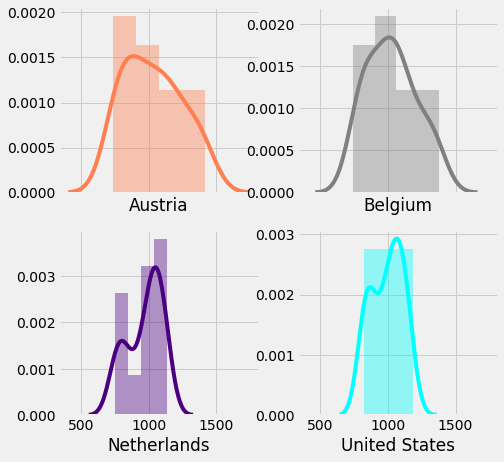

F_onewayResult(statistic=1.129188689957743, pvalue=0.3394977866922905)

In [40]:
# Distribution of the data for specific Countries - United States, Austria, Belgium, Netherlands
# We see that the pvalue for this group is > 0.05. Hence in this case, the dataset is significant and the null
# hypothesis that these are significant to each other holds true.

f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( df_group['Austria'] , color="coral", label="Austria", ax=axes[0, 0])
sns.distplot( df_group['Belgium'] , color="gray", label="Belgium", ax=axes[0, 1])
sns.distplot( df_group['Netherlands'] , color="indigo", label="Netherlands", ax=axes[1, 0])
sns.distplot( df_group['United States'] , color="cyan", label="United States", ax=axes[1, 1])

# Save figure
plt.savefig("Charts/US_Mortality_v_Countries_significant.png",bbox_inches="tight",dpi = 150)
plt.show()

stats.f_oneway(group1, group2, group3, group5)